# Context 
Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

# Content
This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

# Question

- What can we learn about different hosts and areas?
- What are features that influence price of accomodation?
- Which hosts are the mos popular and why?
- Which machine learning model does the best job in predicting the price ?

# Breakdown of this notebook :
    
1. Acquaring and loading dataset
2. Understanding and Cleaning of Data
3. Data Visualization
4. Feature Engineering 
5. Splitting Train and Test dataset
6. Model Prediction 

In [1]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Acquaring and Loading Data

In [2]:
df = pd.read_csv('C:/Users/raehy/Downloads/nyc_airbnb.csv')

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


In [4]:
# This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric
df.shape

(48895, 16)

In [5]:
# most of travellers stay less than 3 days per accomodation.
min_night_neigh = df.groupby('minimum_nights').neighbourhood_group.value_counts()

In [6]:
df.groupby('minimum_nights')['neighbourhood_group'].value_counts().groupby(level=1)

# Data Cleaning 
- Dropping insignificant or redundant features
- Filling missing data

In [7]:
# last_review and reviews_per_month columns have significant missing value. 
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
#Drop columns that are deemed to be insigfinicant or redundant for predction on datas of future variable
df.drop(['id','name','host_name','last_review'], axis=1, inplace=True) 

In [9]:
# Let's assume that all NaN values in "reviews_per_month" column is 0 
df.fillna({'reviews_per_month':0}, inplace=True)

In [10]:
# Now, we are confirmed that there aren't missing data
df.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

# Understanding Data 
- Data type
- Dount 
- Relation with other features (using groupby & value_counts)

In [11]:
df.dtypes

host_id                             int64
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [12]:
# Let's identify values and amount of values in the three categorical variables. In the feature engineering part later, 
# these values will be transformed to numerical value
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [13]:
# This categorical feature has over 200 unique values, which will be converted into numeric value 
df['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [14]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [15]:
# Popular touristic neighbourhoods in Manhattan and Brooklyn well score in count of hosts 
pd.value_counts(df['neighbourhood']).head(10) 

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

In [16]:
# Manhattan and Brookly place the majority of Airbnb hosts in NYC
df.groupby('neighbourhood_group').room_type.value_counts() 


neighbourhood_group  room_type      
Bronx                Private room         652
                     Entire home/apt      379
                     Shared room           60
Brooklyn             Private room       10132
                     Entire home/apt     9559
                     Shared room          413
Manhattan            Entire home/apt    13199
                     Private room        7982
                     Shared room          480
Queens               Private room        3372
                     Entire home/apt     2096
                     Shared room          198
Staten Island        Private room         188
                     Entire home/apt      176
                     Shared room            9
Name: room_type, dtype: int64

In [17]:
# multitude of host ids with over hundrends of hosting indicates that some hosts operate airbnb hosting as a corporate business
df.host_id.value_counts().head(10)

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

# Data Visualization

- Price Distribution

(0, 1000)

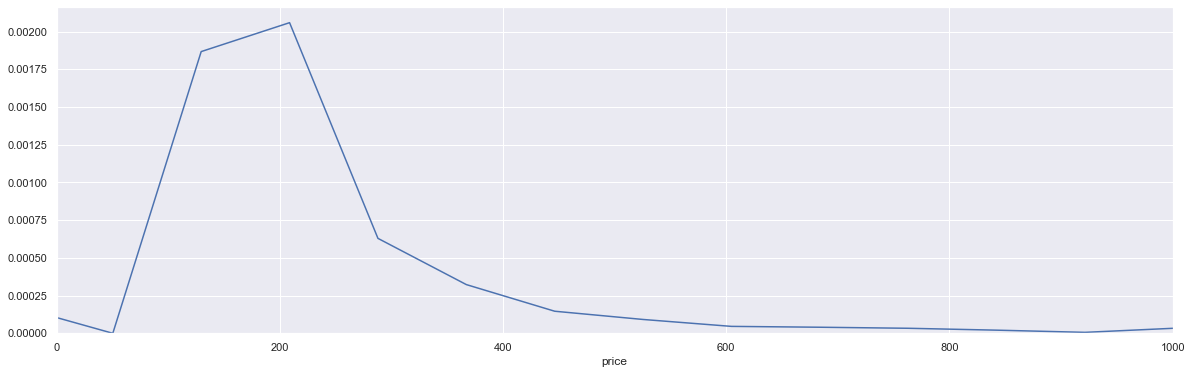

In [18]:
# Distribution of Price shows that median price is close to $200. The most popular price range is between $150 ~ $250.
sns.set(rc={'figure.figsize':(20,6)}) 
sns.distplot(df['price'], rug= False, hist=False, kde=True) 
plt.xlim(0,1000)

- Neighbourhood Groups (NYC Boroughs)

Text(0.5, 1.0, 'NYC Boroughs vs Price')

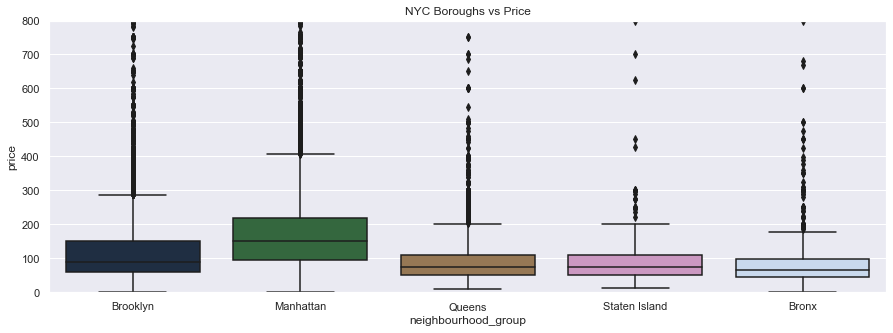

In [19]:
# As we expected, Manhattan boasts of the most pricey accomodation choices, followed by Brooklyn.
# In the two boroughs, majority of NYC's touristic attractions are concentrated
fig = plt.figure(figsize=(15,5))
sns.boxplot(data=df, x='neighbourhood_group', y ='price', palette='cubehelix')
plt.ylim(0,800) # to capture median and IQR value of each boroughs, I set ylim to 800.
plt.title('NYC Boroughs vs Price')

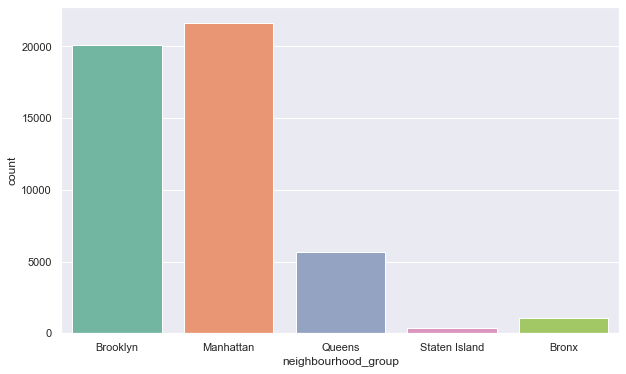

In [20]:
# Manhattan and Brooklyn being the most touristic boroughs not only boasts of high price but also high quality of host
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x='neighbourhood_group', palette='Set2')

- Neighbourhoods

In [21]:
# Select top 20 neighbourhood with the highest number of hosts, and let us analyze what type of room these neighbourhood tend to rent in Airbnb
sub_1 = df.loc[df['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick','Upper West Side', 'Hell\s Kitchen''East Village','Upper East Side','Crown Heights', 'Midtown','East Harlem','Greenpoint','Chelsea','Lower East Side','Astoria','Washington Heights','West Village','Financial District','Flatbush','Clinton Hill','Long Island City','Prospect-Lefferts Gardens'])]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

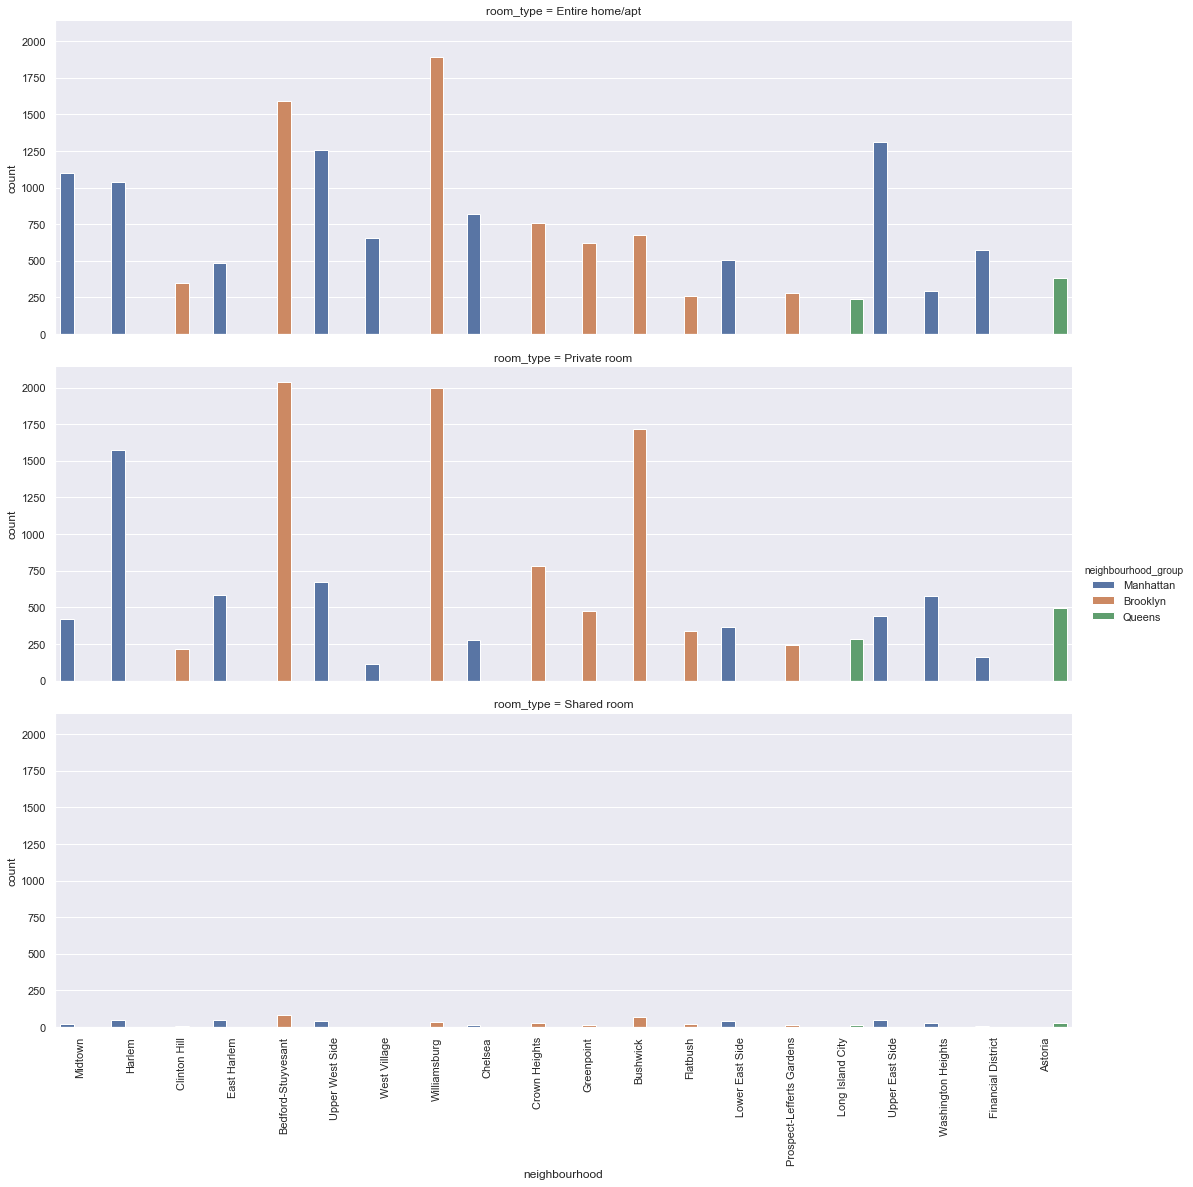

In [22]:
# Neighbourhoods in Brooklyn are skewed to rent private room, meanwhile Manhattan slightly skews to entire home/apt.
sns.catplot(x='neighbourhood', hue='neighbourhood_group', row='room_type', data=sub_1, kind='count',height=5,aspect=3)
plt.xticks(rotation='vertical')

(0, 1000)

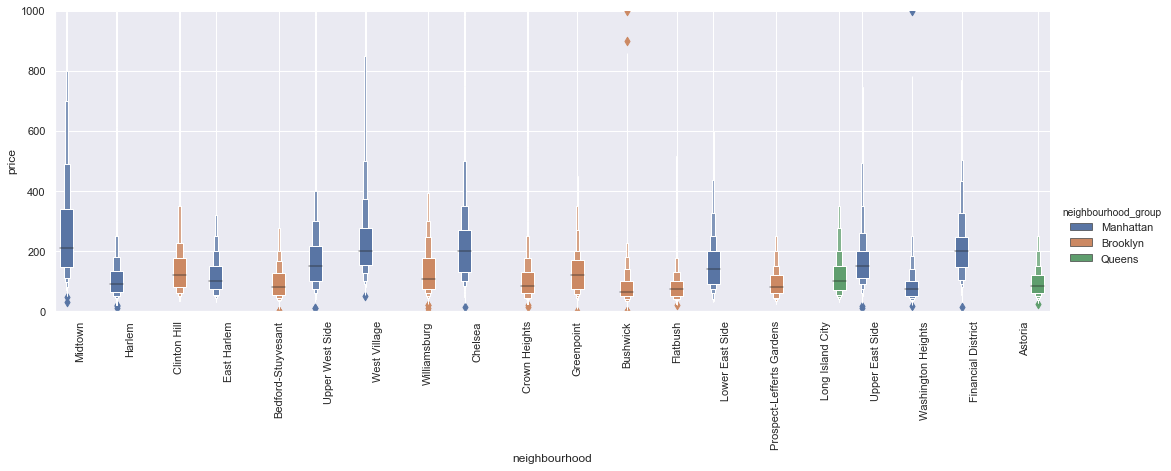

In [23]:
# Neighbourhoods in Manhattan that tends to rent entire home/apt charge higher price than neighbourhoods in Brooklyn.
sns.catplot(x='neighbourhood', y='price', data=sub_1, kind='boxen', hue='neighbourhood_group', height=5, aspect=3)
plt.xticks(rotation='vertical')
plt.ylim(0,1000)

In [24]:
# Let's see if there is meaninful relation between neighbourhood and minimum night stay
df_neighbourhood_min_night = df.groupby('neighbourhood').agg({'minimum_nights':'median'}).sort_values('minimum_nights', ascending=False).reset_index()

In [25]:
df_neighbourhood_min_night.columns

Index(['neighbourhood', 'minimum_nights'], dtype='object')

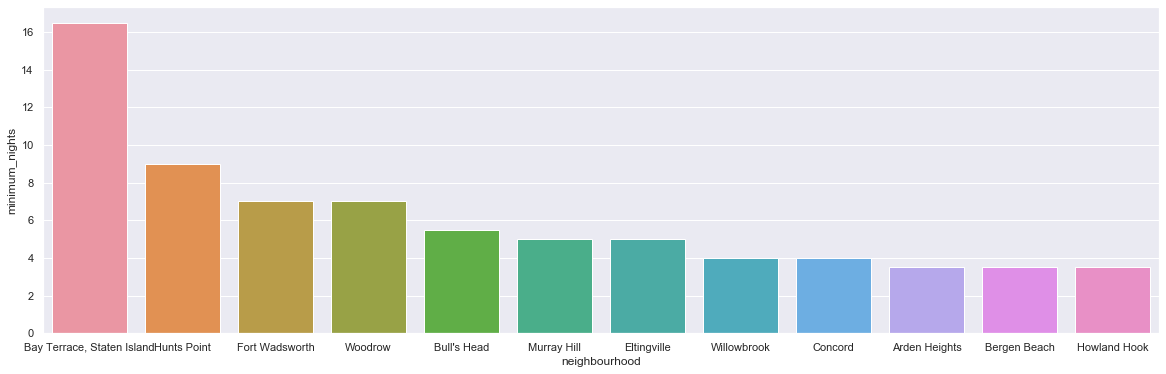

In [26]:
# turns out to be that tourists tends to stay longer in inexpensive non-touristic neighbourhoods
sns.barplot(x='neighbourhood', y='minimum_nights', data=df_neighbourhood_min_night.head(12)) 

- Minimum Night

(0, 60)

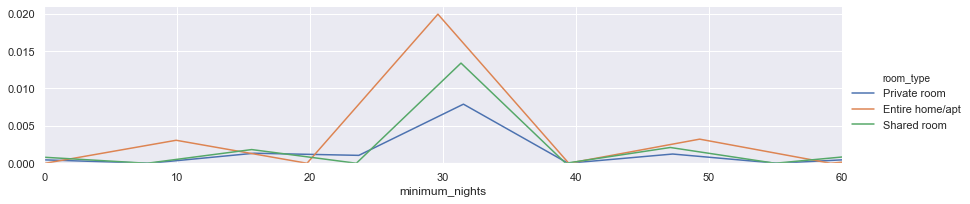

In [27]:
# Let's take a look at relation between minimum_night stay and room type 
# long-term travelers tend to book for 10 and 30 dyas of period, and prefer to rent entire home/apt
minimum_nights = sns.FacetGrid(df, hue='room_type', aspect=4);
minimum_nights.map(sns.kdeplot, 'minimum_nights');
minimum_nights.add_legend()
plt.xlim(0,60)

- Host ID

In [28]:
top_host=df['host_id'].value_counts().head(10)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [29]:
# let's find out which hosts own the large number of properties listed in Airbnb NYC, and in which borough they operate
top_host = df.groupby(['host_id','neighbourhood_group']).size().sort_values(ascending=False)[:12]
top_host

host_id    neighbourhood_group
219517861  Manhattan              327
107434423  Manhattan              230
30283594   Manhattan              121
16098958   Manhattan               96
12243051   Manhattan               96
61391963   Manhattan               91
22541573   Manhattan               86
137358866  Queens                  79
200380610  Manhattan               65
7503643    Brooklyn                52
1475015    Manhattan               52
120762452  Manhattan               50
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

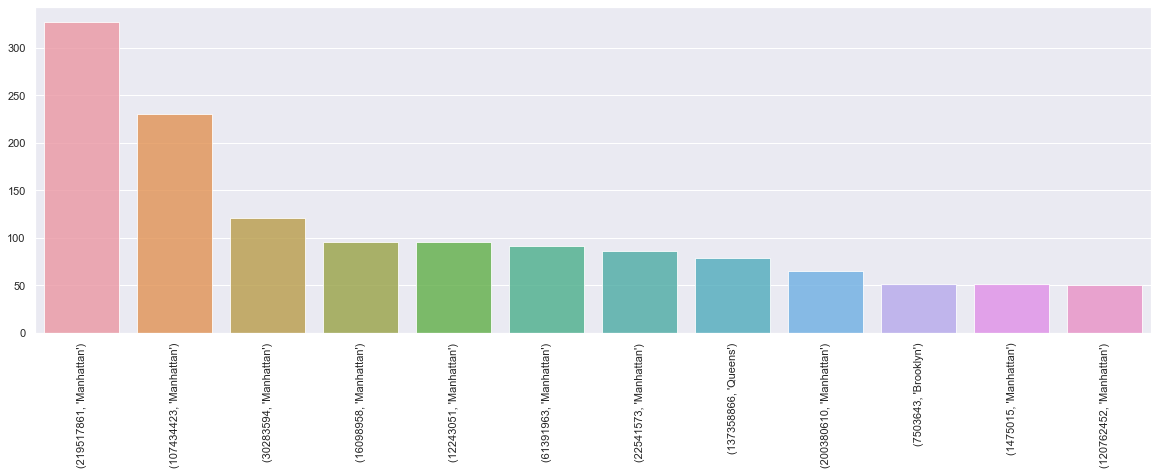

In [30]:
# these hosts must be operated as a corporation or partnership
sns.barplot(top_host.index, top_host.values, alpha=0.8) 
plt.xticks(rotation='vertical')

-  Popularity Index 
   -  Find 10 most popular hosts based on number of reviews

In [31]:
df_top_host_choice = df.groupby('host_id').agg({'number_of_reviews': 'sum'})

In [32]:
total_reviews= df['number_of_reviews'].sum()
total_reviews

1138005

- Populartiy Index = number of review / total review 

In [33]:
df_top_host_choice['popularity_index'] = df_top_host_choice['number_of_reviews'].apply(lambda x: x/float(total_reviews)*100) 

In [34]:
df_top_host_choice.sort_values('popularity_index', ascending=False).head(10)

,number_of_reviews,popularity_index
host_id,,
37312959,2273,0.199736
344035,2205,0.193760
26432133,2017,0.177240
35524316,1971,0.173198
40176101,1818,0.159753
4734398,1798,0.157996
16677326,1355,0.119068
6885157,1346,0.118277
219517861,1281,0.112565


In [35]:
# delete "number_of_review"column prior to merge with the original dataframe to avoice redundancy 
df_top_host_choice= df_top_host_choice.reset_index()
del df_top_host_choice['number_of_reviews']

In [36]:
# now 'popularity_index' column is added at the right-end of the dataframe 
df = pd.merge(df, df_top_host_choice)
df.head(5)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,popularity_index
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,0.009227
1,2787,Brooklyn,Bensonhurst,40.60951,-73.97622,Private room,99,1,21,0.50,6,153,0.009227
2,2787,Brooklyn,Gravesend,40.60755,-73.97410,Private room,79,1,17,0.40,6,174,0.009227
3,2787,Brooklyn,Gravesend,40.60810,-73.97541,Private room,149,1,24,0.64,6,180,0.009227
4,2787,Brooklyn,Bensonhurst,40.60951,-73.97642,Shared room,79,1,15,0.43,6,180,0.009227


- Popularity Index vs Neighbourhood

In [37]:
# By adding popularity index of 'each host_id'onto 'neighbhourhood', we can plot popularity by neighbourhood 
df_popular_neighbourhood = df.groupby('neighbourhood').agg({'popularity_index': 'sum'}).reset_index() 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

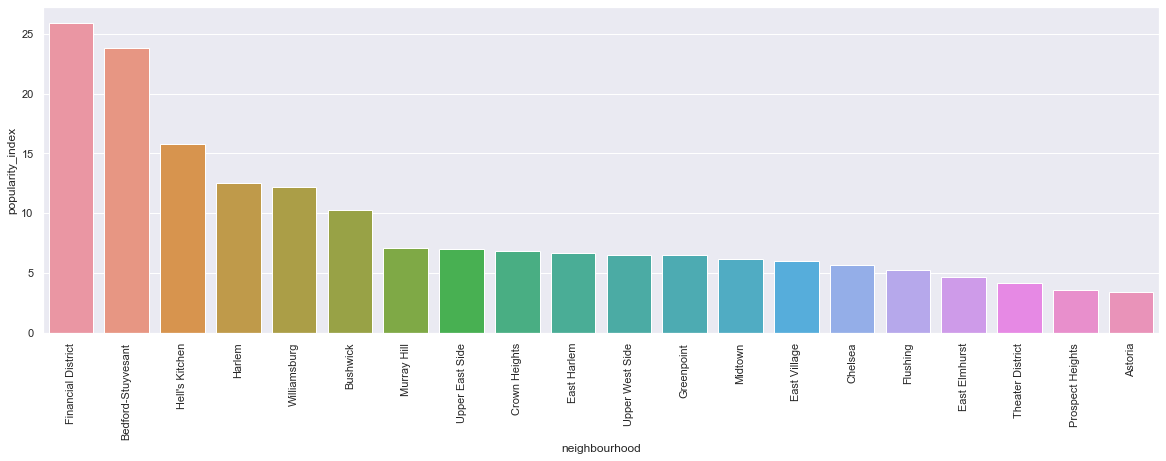

In [38]:
sns.barplot(x='neighbourhood', y= 'popularity_index', data=df_popular_neighbourhood.sort_values('popularity_index', ascending=False).head(20))
plt.xticks(rotation='vertical')

In [39]:
top_host = df.neighbourhood.value_counts().head(10)
top_host

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

# Host Distribution Map

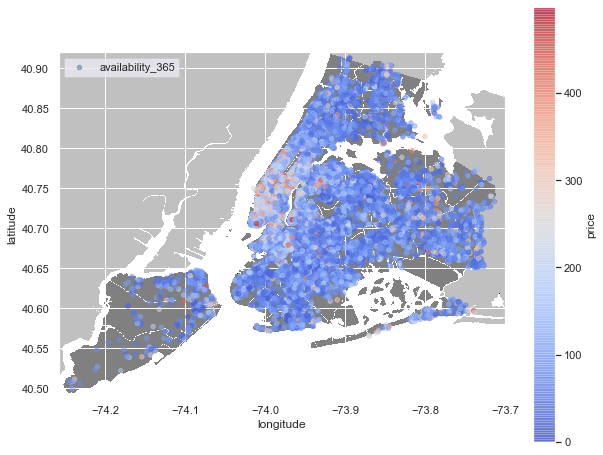

In [40]:
# Let us visualize distribution of airbnb listing with price on throughout the NYC.
# It is easily noticeable that Manhattan and Northwestern part of Brooklyn (where Williamsburg is located) show high concentraiton of listing as well as higher price
import urllib
plt.figure(figsize=(10,8)) 
host_map = df[df.price <500] # limiting sub-datafram from extreme values / less than $500

#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)

#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
plot = host_map.plot(kind ='scatter', x='longitude', y ='latitude', label ='availability_365', c='price', ax=ax, cmap=plt.get_cmap('coolwarm'), colorbar=True, alpha=0.5, zorder=5)

# Heat Map

- Pearson Correlation Heatmap 
- Red indicates high postivie correlation between two features, blue indicates low correlation between two features. 
- Most of features aren't highly correlated in mutual comparison so I wouldnt eliminate none of the features.


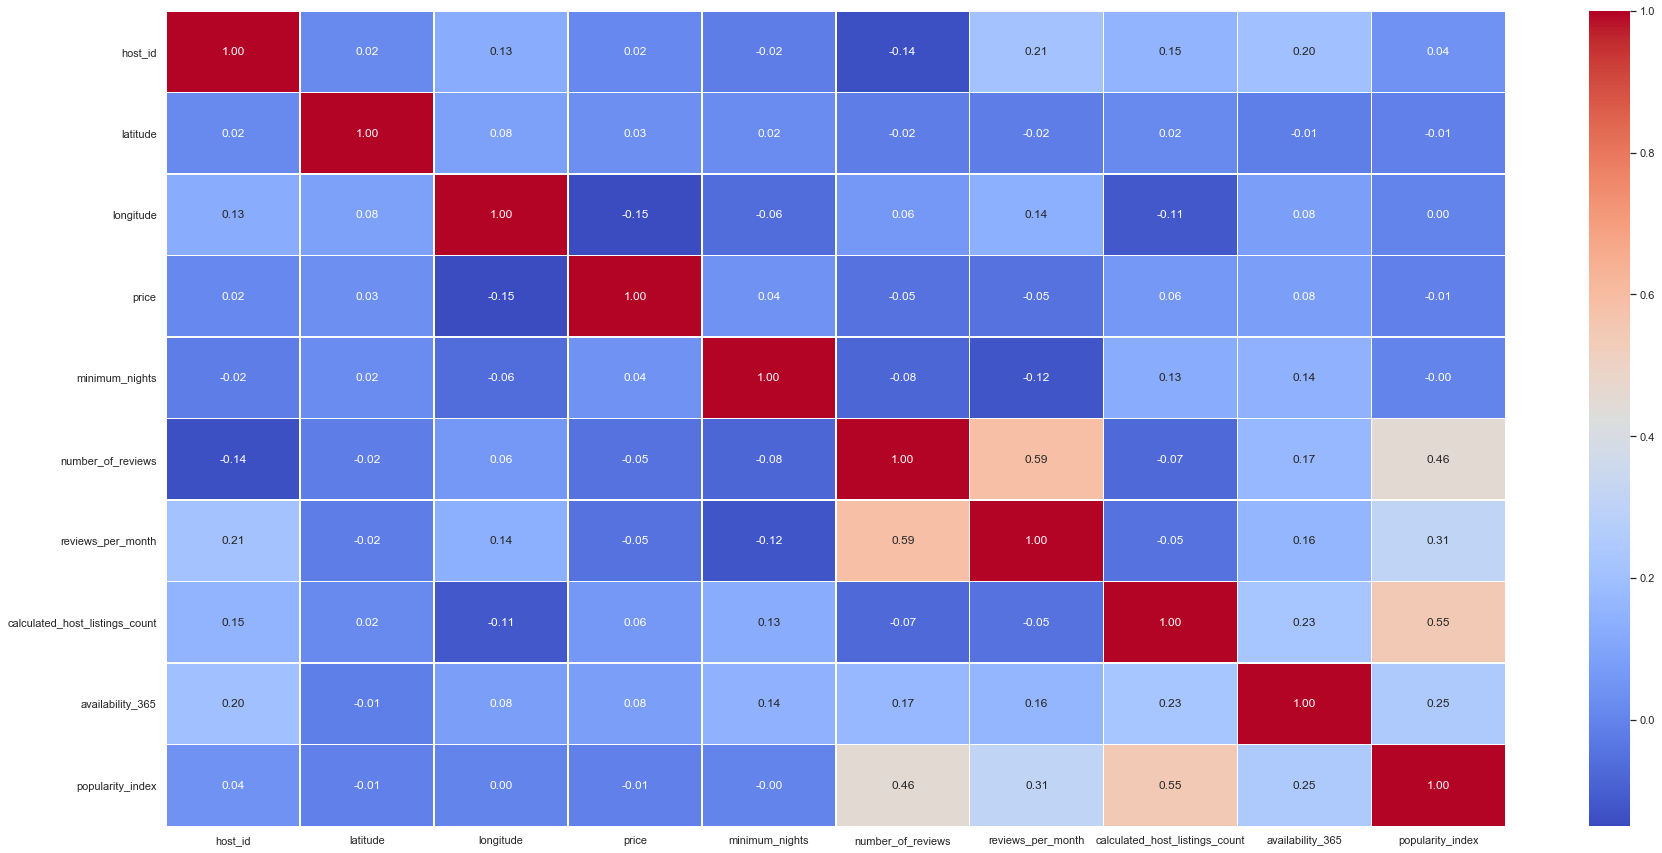

In [41]:

sns.set(rc={'figure.figsize':(30,15)})
sns.heatmap(df.corr(), linewidths=0.5, annot=True, fmt='.2f', cmap='coolwarm')

# Statsmodels
- Statsmodels is a Python package that provides a complement to scipy for statistical computations including descriptive statistics and estimation and inference for statistical models.
- Prior to conduct regression machine learning later in this project, Statsmodel provides general panomara of "fitness" among features in statistical term. 

In [42]:
import statsmodels.formula.api as smf


In [43]:
df_reg1 = smf.ols("price ~ neighbourhood_group + neighbourhood", data=df).fit() 
df_reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     15.96
Date:                Wed, 11 Dec 2019   Prob (F-statistic):               0.00
Time:                        05:40:26   Log-Likelihood:            -3.3568e+05
No. Observations:               48895   AIC:                         6.718e+05
Df Residuals:                   48674   BIC:                         6.738e+05
Df Model:                         220                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                      88.2271     35.915      2.457      0.014      17.833     158.621
neighbourhood_group[T.Brooklyn]              5.096e+12   4.31e+13      0.118      0.906   -7.94e+13    8.95e+13
neighbourhood_group[T.Manhattan]            -1.423e+13   4.19e+13     -0.339      0.734   -9.64e+13     6.8e+13
neighbourhood_group[T.Queens]                1.004e+12   4.39e+12      0.228      0.819   -7.61e+12    9.61e+12
neighbourhood_group[T.Staten Island]         2.563e+11   7.22e+11      0.355      0.722   -1.16e+12    1.67e+12
neighbourhood[T.Arden Heights]              -2.563e+11   7.22e+11     -0.355      0.722   -1.67e+12    1.16e+12
neighbourhood[T.Arrochar]                   -2.563e+11   7.22e+11     -0.355      0.722   -1.67e+12    1.16e+12
neighbourhood[T.Arverne]                    -1.004e+12   4.39e+12     -0.228      0.819   -9.61e+12    7.61e+12
neighbourhood[T.Astoria]                    -1.004e+12   4.39e+12     -0.228      0.819   -9.61e+12    7.61e+12
neighbourhood[T.Bath Beach]                 -5.096e+12   4.31e+13     -0.118      0.906   -8.95e+13    7.94e+13
neighbourhood[T.Battery Park City]           1.423e+13   4.19e+13      0.339      0.734    -6.8e+13    9.64e+13
neighbourhood[T.Bay Ridge]                  -5.096e+12   4.31e+13     -0.118      0.906   -8.95e+13    7.94e+13
neighbourhood[T.Bay Terrace]                -1.004e+12   4.39e+12     -0.228      0.819   -9.61e+12    7.61e+12
neighbourhood[T.Bay Terrace, Staten Island] -2.563e+11   7.22e+11     -0.355      0.722   -1.67e+12    1.16e+12
neighbourhood[T.Baychester]                   -12.9572     94.959     -0.136      0.891    -199.079     173.165
neighbourhood[T.Bayside]                    -1.004e+12   4.39e+12     -0.228      0.819   -9.61e+12    7.61e+12
neighbourhood[T.Bayswater]                  -1.004e+12   4.39e+12     -0.228      0.819   -9.61e+12    7.61e+12
neighbourhood[T.Bedford-Stuyvesant]         -5.096e+12   4.31e+13     -0.118      0.906   -8.95e+13    7.94e+13
neighbourhood[T.Belle Harbor]               -1.004e+12   4.39e+12     -0.228      0.819   -9.61e+12    7.61e+12
neighbourhood[T.Bellerose]                  -1.004e+12   4.39e+12     -0.228      0.819   -9.61e+12    7.61e+12
neighbourhood[T.Belmont]                      -10.5178     59.482     -0.177      0.860    -127.104     106.068
neighbourhood[T.Bensonhurst]                -5.096e+12   4.31e+13     -0.118      0.906   -8.95e+13    7.94e+13
neighbourhood[T.Bergen Beach]               -5.096e+12   4.31e+13     -0.118      0.906   -8.95e+13    7.94e+13
neighbourhood[T.Boerum Hill]                -5.096e+12   4.31e+13     -0.118      0.906   -8.95e+13    7.94e+13
neighbourhood[T.Borough Park]               -5.096e+12   4.

In [44]:
df_reg2 = smf.ols("price ~ room_type", data=df).fit() 
df_reg2

In [45]:
# when p value is less than alpha 0.05, we reject null hypothesis - feature and target are not related 
df_reg1 = smf.ols("price ~ neighbourhood_group + minimum_nights + reviews_per_month + calculated_host_listings_count + availability_365 + popularity_index", data=df).fit() 
df_reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     224.6
Date:                Wed, 11 Dec 2019   Prob (F-statistic):               0.00
Time:                        05:40:28   Log-Likelihood:            -3.3640e+05
No. Observations:               48895   AIC:                         6.728e+05
Df Residuals:                   48885   BIC:                         6.729e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               69.2617      7.301      9.487      0.000      54.952      83.571
neighbourhood_group[T.Brooklyn]         45.4821      7.342      6.195      0.000      31.092      59.872
neighbourhood_group[T.Manhattan]       113.5561      7.337     15.477      0.000      99.175     127.937
neighbourhood_group[T.Queens]           16.5770      7.785      2.129      0.033       1.318      31.836
neighbourhood_group[T.Staten Island]    22.8181     14.120      1.616      0.106      -4.857      50.493
minimum_nights                           0.1051      0.053      1.968      0.049       0.000       0.210
reviews_per_month                       -5.5020      0.742     -7.418      0.000      -6.956      -4.048
calculated_host_listings_count           0.2326      0.041      5.640      0.000       0.152       0.313
availability_365                         0.1747      0.009     20.232      0.000       0.158       0.192
popularity_index                      -709.9302    100.714     -7.049      0.000    -907.331    -512.529
==============================================================================
Omnibus:                   106890.843   Durbin-Watson:                   1.722
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        796585794.796
Skew:                          19.885   Prob(JB):                         0.00
Kurtosis:                     627.036   Cond. No.                     1.64e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Feature Engineering

## Logarithmic Transformation
- Logarithmic Transforamtion is a convenient means of transforming a highly skewed variable into a more normalized dataset.This can be valuable both for making patterns in the data more interpretable and for helping to meet the assumptions of inferential statistics.

As we can see that the price distribution is very unevenly distributed, with most being low priced. So there is no use of finding mean of the prices as it will have affect of outliers.


Below grafph, the good fit indicates that normality is a reasonably applied.

In [46]:
from scipy.stats import norm
from scipy import stats
df['price_log'] = np.log(df.price+1)

In [47]:
# let us log transform "price"

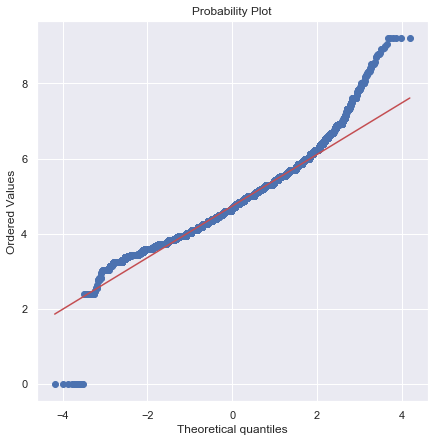

In [48]:
plt.figure(figsize=(7,7))
stats.probplot(df['price_log'], plot=plt)
plt.show()

In [49]:
# Delete Price, as we have log transformed price value.
df.drop(['price'], axis=1, inplace=True) 

In [50]:
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,popularity_index,price_log
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,1,9,0.21,6,365,0.009227,5.010635
1,2787,Brooklyn,Bensonhurst,40.60951,-73.97622,Private room,1,21,0.50,6,153,0.009227,4.605170
2,2787,Brooklyn,Gravesend,40.60755,-73.97410,Private room,1,17,0.40,6,174,0.009227,4.382027
3,2787,Brooklyn,Gravesend,40.60810,-73.97541,Private room,1,24,0.64,6,180,0.009227,5.010635
4,2787,Brooklyn,Bensonhurst,40.60951,-73.97642,Shared room,1,15,0.43,6,180,0.009227,4.382027


# Encoding 

## Target Encoding
- A feature that  has a lot of categories then a one-hot encoding scheme will produce many columns which can cause memory issues.
- Here comes Target Encoding, it is  is a fast way to get the most out of your categorical variables with little effort.
- The idea is quite simple. Say you can have a categorical variable x and a target y – y can be binary or continuous, it doesn’t matter. For each distinct element in x you’re going to compute the average of the corresponding values in y. Then you’re going to replace each xi with the according mean.

- In following, we will apply target encoding to neighbourhood and neighbourhood_group, the categorical variables with huge value 

In [51]:
mean = df['price_log'].mean()
# compute the number of values and the mean of each group
agg = df.groupby('neighbourhood')['price_log'].agg(['count','mean'])
counts = agg['count']
means = agg['mean']
weight = 100
# Compute the 'smoothed' means
smooth = (counts*means+weight*mean)/(counts + weight)
# Replace easy value by the according smoothed mean
print (smooth)

neighbourhood
Allerton                      4.603716
Arden Heights                 4.715869
Arrochar                      4.674485
Arverne                       4.782133
Astoria                       4.517957
Bath Beach                    4.675349
Battery Park City             4.957623
Bay Ridge                     4.596547
Bay Terrace                   4.738917
Bay Terrace, Staten Island    4.732658
Baychester                    4.709230
Bayside                       4.647717
Bayswater                     4.683812
Bedford-Stuyvesant            4.455737
Belle Harbor                  4.759155
Bellerose                     4.706627
Belmont                       4.611996
Bensonhurst                   4.523231
Bergen Beach                  4.724995
Boerum Hill                   4.909830
Borough Park                  4.340370
Breezy Point                  4.755050
Briarwood                     4.618515
Brighton Beach                4.629506
Bronxdale                     4.619668
Brooklyn He

In [52]:
df.loc[:, 'neighbourhood_target_enc'] = df['neighbourhood'].map(smooth)
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,popularity_index,price_log,neighbourhood_target_enc
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,1,9,0.21,6,365,0.009227,5.010635,4.489170
1,2787,Brooklyn,Bensonhurst,40.60951,-73.97622,Private room,1,21,0.50,6,153,0.009227,4.605170,4.523231
2,2787,Brooklyn,Gravesend,40.60755,-73.97410,Private room,1,17,0.40,6,174,0.009227,4.382027,4.512596
3,2787,Brooklyn,Gravesend,40.60810,-73.97541,Private room,1,24,0.64,6,180,0.009227,5.010635,4.512596
4,2787,Brooklyn,Bensonhurst,40.60951,-73.97642,Shared room,1,15,0.43,6,180,0.009227,4.382027,4.523231


In [53]:
mean = df['price_log'].mean()
# compute the number of values and the mean of each group
agg = df.groupby('neighbourhood_group')['price_log'].agg(['count','mean'])
counts = agg['count']
means = agg['mean']
weight = 100
# Compute the 'smoothed' means
smooth = (counts*means+weight*mean)/(counts + weight)
# Replace eacy value by the according smoothed mean
print (smooth)

neighbourhood_group
Bronx            4.296989
Brooklyn         4.577623
Manhattan        5.006232
Queens           4.391900
Staten Island    4.461079
dtype: float64


In [54]:
df.loc[:, 'neighbourhood_group_tar_enc'] = df['neighbourhood_group'].map(smooth)
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,popularity_index,price_log,neighbourhood_target_enc,neighbourhood_group_tar_enc
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,1,9,0.21,6,365,0.009227,5.010635,4.489170,4.577623
1,2787,Brooklyn,Bensonhurst,40.60951,-73.97622,Private room,1,21,0.50,6,153,0.009227,4.605170,4.523231,4.577623
2,2787,Brooklyn,Gravesend,40.60755,-73.97410,Private room,1,17,0.40,6,174,0.009227,4.382027,4.512596,4.577623
3,2787,Brooklyn,Gravesend,40.60810,-73.97541,Private room,1,24,0.64,6,180,0.009227,5.010635,4.512596,4.577623
4,2787,Brooklyn,Bensonhurst,40.60951,-73.97642,Shared room,1,15,0.43,6,180,0.009227,4.382027,4.523231,4.577623


## One Hot Encoding 

One-hot encoding is a sparse way of representing data in a binary string in which only a single bit can be 1, while all others are 0

In [55]:
df_OHEnc = pd.get_dummies(df.room_type).iloc[:,1:]

In [56]:
df = pd.concat([df, df_OHEnc], axis=1)

In [57]:
df.drop(['neighbourhood_group','neighbourhood'], axis=1, inplace=True) 

In [58]:
df.head()

,host_id,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,popularity_index,price_log,neighbourhood_target_enc,neighbourhood_group_tar_enc,Private room,Shared room
0,2787,40.64749,-73.97237,Private room,1,9,0.21,6,365,0.009227,5.010635,4.489170,4.577623,1,0
1,2787,40.60951,-73.97622,Private room,1,21,0.50,6,153,0.009227,4.605170,4.523231,4.577623,1,0
2,2787,40.60755,-73.97410,Private room,1,17,0.40,6,174,0.009227,4.382027,4.512596,4.577623,1,0
3,2787,40.60810,-73.97541,Private room,1,24,0.64,6,180,0.009227,5.010635,4.512596,4.577623,1,0
4,2787,40.60951,-73.97642,Shared room,1,15,0.43,6,180,0.009227,4.382027,4.523231,4.577623,0,1


In [59]:
# Original categorical columns were replaced by numeric value
df.columns

Index(['host_id', 'latitude', 'longitude', 'room_type', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'popularity_index', 'price_log', 'neighbourhood_target_enc',
       'neighbourhood_group_tar_enc', 'Private room', 'Shared room'],
      dtype='object')

# Split dataset to Train and Test

- The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We have the test dataset (or subset) in order to test our model’s prediction on this subset.
- The test_size=0.3 inside the function indicates the percentage of the data that should be held over for testing. It’s usually around 80/20 or 70/30.







In [60]:
features = ['latitude', 'longitude',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'popularity_index', 'neighbourhood_target_enc',
       'neighbourhood_group_tar_enc', 'Private room', 'Shared room']


In [61]:
X = df[features]
y = df.price_log

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)



In [64]:
# Does StandardScalers come after or before train and test split ?
# StandardScaler will transform data X in such that its distribution will have a mean value 0 and standard deviation of 1.
scaler = StandardScaler()
X = scaler.fit_transform(X) 

In [65]:
print('Dimensions of the training feature matrix: {}'.format(X_train.shape))
print('Dimensions of the training target vector: {}'.format(y_train.shape))
print('Dimensions of the test feature matrix: {}'.format(X_test.shape))
print('Dimensions of the test target vector: {}'.format(y_test.shape))

Dimensions of the training feature matrix: (34226, 12)
Dimensions of the training target vector: (34226,)
Dimensions of the test feature matrix: (14669, 12)
Dimensions of the test target vector: (14669,)


In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet


from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

##  K-Fold Cross Validation 
- Before model building, 5-Fold Cross Validaiton will be implemented for validation

In [67]:

kfold_cv=KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in kfold_cv.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

##  Polynominal Transformation
- The polynomial transformation will be made with second degree which adding the square of each feature to avoid over-fitting, and then apply Linear Regression on it.


In [68]:
Poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train = Poly.fit_transform(X_train)
X_test = Poly.fit_transform(X_test)

# Model Prediction

As mean of evaluating prediction performance of each model, we will use MAE (Mean absoluate error), RMSE (Root Mean Squared Error) and R-Squared (Coefficient of determination) 

- MAE represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.

- RMSE is the error rate by the square root of MSE.

- R-squared (Coefficient of determination) represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

In [69]:
##Linear Regression
lr = LinearRegression(copy_X= True, fit_intercept = True, normalize = True)
lr.fit(X_train, y_train)
lr_pred= lr.predict(X_test)

#Ridge Model
ridge_model = Ridge(alpha = 0.01, normalize = True)
ridge_model.fit(X_train, y_train)             
pred_ridge = ridge_model.predict(X_test) 

#Lasso Model
Lasso_model = Lasso(alpha = 0.001, normalize =False)
Lasso_model.fit(X_train, y_train)
pred_Lasso = Lasso_model.predict(X_test)

##ElasticNet
Elastic_model = ElasticNet(alpha = 0.01, normalize=False)
Elastic_model.fit(X_train, y_train) 
pred_Elastic= Elastic_model.predict(X_test)


In [70]:
print('-------------Lineer Regression-----------')
print('MAE: %f'% mean_absolute_error(y_test, lr_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, lr_pred)))   
print('R2 %f' % r2_score(y_test, lr_pred))


-------------Lineer Regression-----------
MAE: 0.357966
RMSE: 0.491945
R2 0.573784


In [71]:
print('---------------Ridge ---------------------')
print('MAE: %f'% mean_absolute_error(y_test, pred_ridge))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, pred_ridge)))   
print('R2 %f' % r2_score(y_test, pred_ridge))

---------------Ridge ---------------------
MAE: 0.358253
RMSE: 0.492787
R2 0.572324


In [72]:
print('---------------Lasso-----------------------')
print('MAE: %f' % mean_absolute_error(y_test, pred_Lasso))
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test, pred_Lasso)))
print('R2 %f' % r2_score(y_test, pred_Lasso))

---------------Lasso-----------------------
MAE: 0.358013
RMSE: 0.492818
R2 0.572271


In [73]:
print('---------------ElasticNet-------------------')
print('MAE: %f' % mean_absolute_error(y_test,pred_Elastic)) 
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test,pred_Elastic))) 
print('R2 %f' % r2_score(y_test, pred_Elastic))

---------------ElasticNet-------------------
MAE: 0.360181
RMSE: 0.497836
R2 0.563516


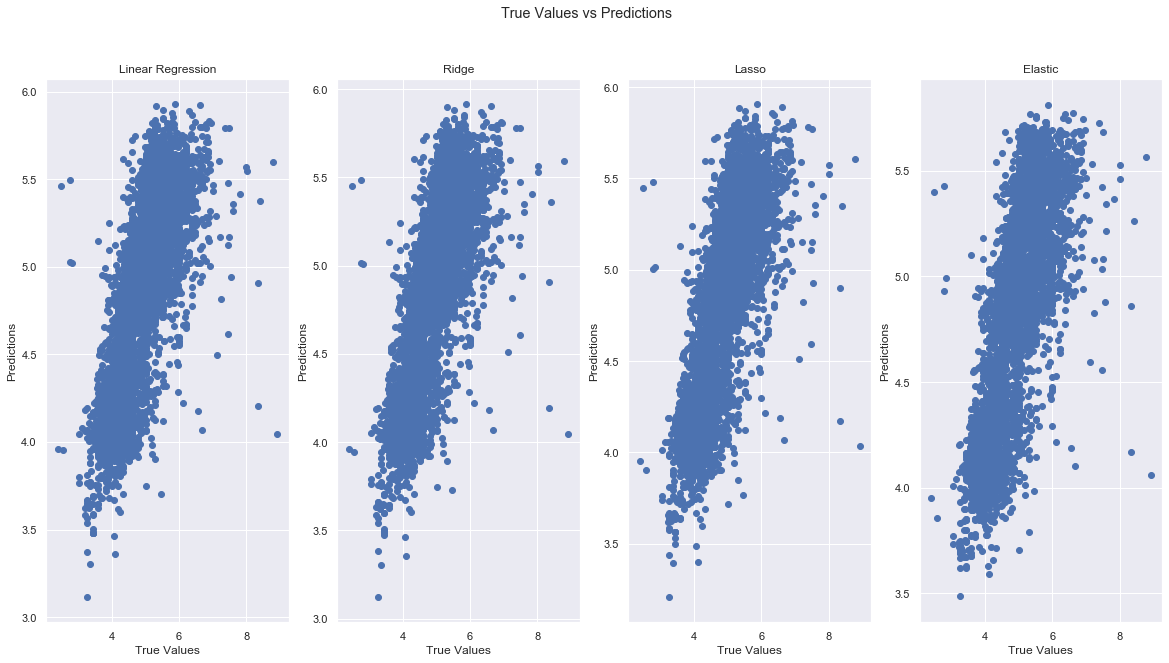

In [74]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20,10))
fig.suptitle('True Values vs Predictions')


ax1.scatter(y_test, lr_pred)
ax1.set_title('Linear Regression')

ax2.scatter(y_test, pred_ridge)
ax2.set_title('Ridge')

ax3.scatter(y_test, pred_Lasso)
ax3.set_title('Lasso')

ax4.scatter(y_test, pred_Elastic)
ax4.set_title('Elastic')

for ax in fig.get_axes():
    ax.set(xlabel='True Values', ylabel='Predictions')

# Resiaul Plot
- The most useful way to plot the residuals, though, is with  predicted values on the x-axis, residuals (observed -predicted) on the y-axis.
- positive values for the residual (on the y-axis) mean the prediction was too low, and negative values mean the prediction was too high; 0 means the guess was exactly correct.
- Residual plots show overwhelming majority of residuals concentrates near the zero, which is considered ideal.

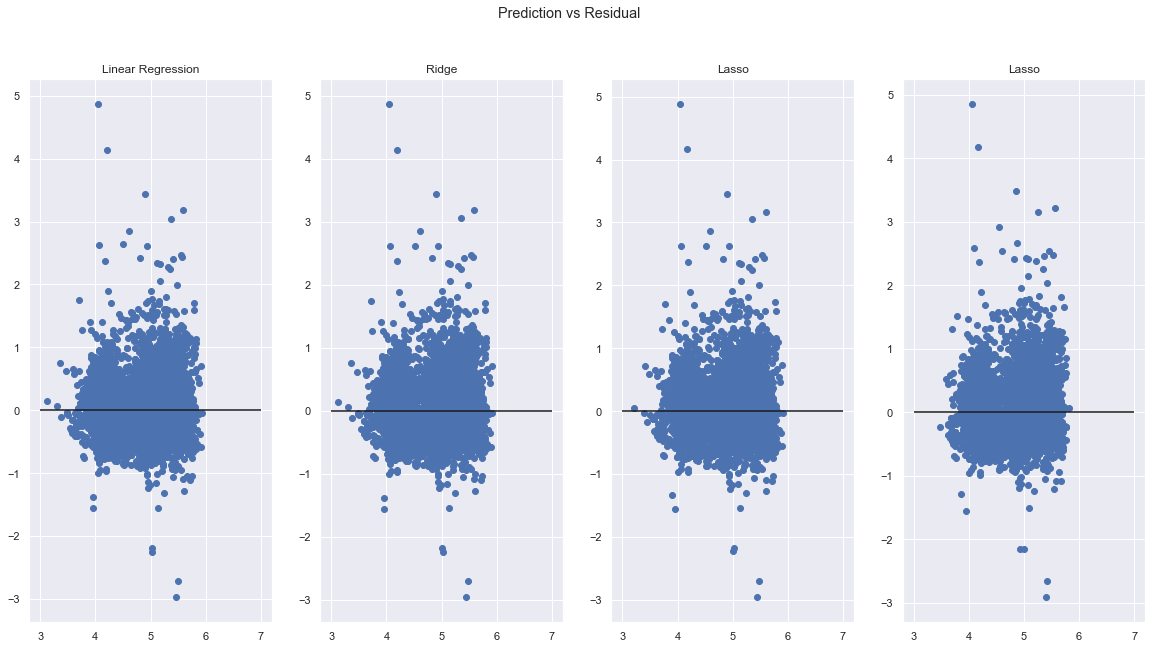

In [75]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20,10))
fig.suptitle('Prediction vs Residual')

ax1.scatter(lr_pred,y_test-lr_pred)
ax1.set_title("Linear Regression")
ax1.hlines(y= 0, xmin=3, xmax=7)

ax2.scatter(pred_ridge, y_test-pred_ridge)
ax2.set_title("Ridge")
ax2.hlines(y= 0, xmin=3, xmax=7)

ax3.scatter(pred_Lasso, y_test-pred_Lasso)
ax3.set_title("Lasso")
ax3.hlines(y= 0, xmin=3, xmax=7)


ax4.scatter(pred_Elastic, y_test-pred_Elastic)
ax4.set_title("Lasso")
ax4.hlines(y= 0, xmin=3, xmax=7)
plt.show()

for ax in fig.get_axes():
    ax.set(xlabel='Predicted', ylabel='Residual')

In [76]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [77]:
# Decision Tree Model
dt_model = DecisionTreeRegressor (max_depth=5, min_samples_leaf=0.1, random_state=42)
dt_model.fit(X_train, y_train)
pred_dt=dt_model.predict(X_test)

In [78]:
print('---------------Decision Tree-----------------------')
print('MAE: %f' % mean_absolute_error(y_test, pred_dt))
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test, pred_dt)))
print('R2 %f' % r2_score(y_test, pred_dt))

---------------Decision Tree-----------------------
MAE: 0.379828
RMSE: 0.527051
R2 0.510783


# Random Forest 
Unfortunately, When I was trying to apply Hyperparameter Tuning with Grid Search CV (due to its computationally expensive nature), the system crashed. Since evaluation result of RF model without hyperparameter tuning is somewhat similar to Decision Tree, I decide not to publish here.

In [79]:
param_grid = {'bootstrap':[True], 'max_depth': [80,90,100,110], 'max_features':[2,3],'min_samples_leaf':[3,4,5],'min_samples_split':[8,10,12], 'n_estimators': [100,200,300,1000]}

In [80]:
rf_model = RandomForestRegressor()

In [81]:
rf_grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv=5, n_jobs= -1, verbose=2)

In [82]:

#rf_grid_search.fit(X_train, y_train)
#rf_grid_search.best_params_

In [83]:
#pred_rf_gs = rf_grid_search.predict(X_test)

In [84]:
gboost_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.01 )
gboost_model.fit(X_train, y_train)
pred_gboost = gboost_model.predict(X_test)

In [85]:
print('---------------Gradient Boosting-----------------------')
print('MAE: %f' % mean_absolute_error(y_test, pred_gboost))
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test, pred_gboost)))
print('R2 %f' % r2_score(y_test, pred_gboost))

---------------Gradient Boosting-----------------------
MAE: 0.416138
RMSE: 0.565624
R2 0.436554


In [88]:
models = pd.DataFrame({'Model':['Linear Regression','Ridge','Lasso','ElasticNet','Decision Tree','GreaidentBoosting'], 'R_Squared': [r2_score(y_test, lr_pred),r2_score(y_test, pred_ridge), r2_score(y_test, pred_Lasso),r2_score(y_test, pred_Elastic),r2_score(y_test, pred_dt),r2_score(y_test, pred_gboost),], 'MAE':[mean_absolute_error(y_test, lr_pred),mean_absolute_error(y_test, pred_ridge),mean_absolute_error(y_test, pred_Lasso),mean_absolute_error(y_test,pred_Elastic), mean_absolute_error(y_test, pred_dt),mean_absolute_error(y_test, pred_gboost)]})
models.sort_values(by='R_Squared', ascending = False) 

,Model,R_Squared,MAE
0,Linear Regression,0.573784,0.357966
1,Ridge,0.572324,0.358253
2,Lasso,0.572271,0.358013
3,ElasticNet,0.563516,0.360181
4,Decision Tree,0.510783,0.379828
5,GreaidentBoosting,0.436554,0.416138


# Conclusion

Overall, Linear Regression performs the best as we saw in r_squared and MAE score.Its reasonably good result may be attribute of application of a cross validation technique - K-fold CV as well as polynominal transformation